### **Name:** Badal Parmar

###  K-means Clustering


# **Importing required libraries**

In [ ]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# **Loading the dataset**

In [ ]:
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)

In [ ]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


# **K-means Clustering algorithm from scratch**

In [ ]:
class kmeans:

  def __init__(self, k=2, iterations=5, plot_clusters=False):
    self.k = k
    self.iterations = iterations
    self.plot_clusters = plot_clusters

    #Initializing an empty sample list for each cluster
    self.clusters = [[] for each in range(self.k)]

    #Initializing an empty list for centroid vector of each cluster
    self.centroids = []

  def predict(self, X):
    self.X = np.array(X)
    self.samples, self.features = X.shape

    index_of_samples = list(range(self.samples))

    for trial in range(1,3):

      #Initializing centroids
      random_indices = np.random.choice(index_of_samples, self.k)
      for e in list(random_indices):
        index_of_samples.remove(e)

      self.centroids = [self.X[index] for index in random_indices]

      #Opimizing the clusters 
      for i in range(self.iterations):

        #Updating clusters 
        self.clusters = self.update_clusters(self.centroids)

        #Updating centroids
        old_centroids = self.centroids
        self.centroids = self.update_centroids(self.clusters)

        #Checking for convergence
        if self.has_converged(old_centroids, self.centroids):
          break

      #Printing the converged clusters
      print("\nTrial {}".format(trial))
      for cluster_index, cluster in enumerate(self.clusters):
        print('\nC{}:'.format(cluster_index),list(cluster))
      print('\n')
      
      #Plotting the converged clusters
      if self.plot_clusters:
        self.plot()

    # return self.get_labels(self.clusters)

  def update_clusters(self, centroids):
    clusters = [[] for _ in range(self.k)]
    for sample_index, sample in enumerate(self.X):

      #Finding the centroid that is closest to the sample
      distances = [self.sum_of_squared_error(sample, centroid) 
      for centroid in centroids]
      closest_centroid_index = np.argmin(distances)

      #Appending the index to the cluster correspoding to the closest centroid
      clusters[closest_centroid_index].append(sample_index)

    return clusters

  def update_centroids(self, clusters):
    centroids = []
    for cluster in clusters:
      centroid = np.mean(self.X[cluster], axis=0)
      centroids.append(centroid)
    return np.array(centroids)

  def has_converged(self, old_centroids, new_centroids):
    distances = [self.sum_of_squared_error(old_centroids[ind], new_centroids[ind])
    for ind in range(self.k)]
    return sum(distances) == 0

  def get_labels(self, clusters):
    labels = np.empty(self.samples)

    for cluster_index, cluster in enumerate(clusters):
      for sample_index in cluster:
        labels[sample_index] = cluster_index
    
    return labels

  def sum_of_squared_error(self, x1, x2):
    return np.sum((x1-x2)**2)  

  def plot(self):
    fig, ax = plt.subplots(figsize=(6,4))

    for i, index in enumerate(self.clusters):
      point = self.X[index].T
      ax.scatter(*point[0:2])
    
    for point in self.centroids:
      ax.scatter(*point[0:2], marker="x", color="black", s=80, linewidth=2)

    plt.show()

# **Running the algorithm with user inputs**


Dataset: Iris Flower


Enter the number of clusters: 2
Enter the maximum number of iterations: 40

Trial 1

C0: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 57, 93, 98]

C1: [50, 51, 52, 53, 54, 55, 56, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 94, 95, 96, 97, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149]




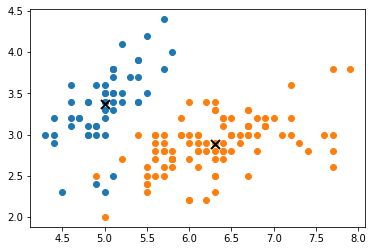


Trial 2

C0: [50, 51, 52, 53, 54, 55, 56, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 94, 95, 96, 97, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149]

C1: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 57, 93, 98]




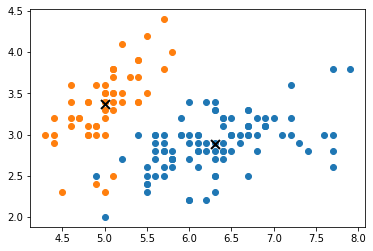


Do you want to continue? (Yes/ No): Yes

Enter the number of clusters: 3
Enter the maximum number of iterations: 60

Trial 1

C0: [51, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 101, 106, 113, 114, 119, 121, 123, 126, 127, 133, 138, 142, 146, 149]

C1: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]

C2: [50, 52, 77, 100, 102, 103, 104, 105, 107, 108, 109, 110, 111, 112, 115, 116, 117, 118, 120, 122, 124, 125, 128, 129, 130, 131, 132, 134, 135, 136, 137, 139, 140, 141, 143, 144, 145, 147, 148]




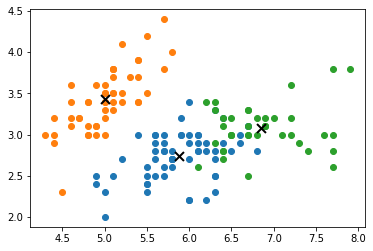


Trial 2

C0: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]

C1: [52, 77, 100, 102, 103, 104, 105, 107, 108, 109, 110, 111, 112, 115, 116, 117, 118, 120, 122, 124, 125, 128, 129, 130, 131, 132, 134, 135, 136, 137, 139, 140, 141, 143, 144, 145, 147, 148]

C2: [50, 51, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 101, 106, 113, 114, 119, 121, 123, 126, 127, 133, 138, 142, 146, 149]




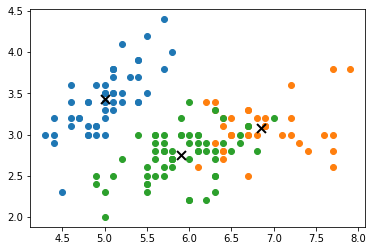


Do you want to continue? (Yes/ No): No


In [ ]:
cont = True
print ('\nDataset: Iris Flower\n')
while cont:
  k = int(input("\nEnter the number of clusters: "))

  if k>len(X):
    print("The value of k cannot be greater than {}".format(len(X)))
    break

  max_iter = int(input("Enter the maximum number of iterations: ")) 
  
  kmeans_model = kmeans(k=k, iterations=max_iter, plot_clusters=True)
  kmeans_model.predict(X)

  temp = input("\nDo you want to continue? (Yes/ No): ")

  if temp.lower()=='no':
    cont = False